In [1]:
## Load the classifier

from keras.models import load_model


classifier = load_model('sketchmodel125final.h5')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [3]:
## python canvas for user input as free hand sketch, saves the image as image.jpg in the root folder

from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 256
height = 256
center = height//2
white = (255, 255, 255)
green = (0,128,0)

def save():
    filename = "image.jpg"
    image1.save(filename)

def paint(event):
    # python_green = "#476042"
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

root = Tk()

# Tkinter create a canvas to draw on
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

# PIL create an empty image and draw object to draw on
# memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

# do the Tkinter canvas drawings (visible)
# cv.create_line([0, center, width, center], fill='green')

cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

# do the PIL image/draw (in memory) drawings
# draw.line([0, center, width, center], green)

# PIL image can be saved as .png .jpg .gif or .bmp file (among others)
# filename = "my_drawing.png"
# image1.save(filename)
button=Button(text="save",command=save)
button.pack()
root.mainloop()

In [2]:
## load the image to classify

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('testing/image.png', target_size = (256,256))
#test_image = image.load_img('/home/kazi/random4.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
#training_set.class_indices

In [3]:
## Load the class indices from training data

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


training_set = train_datagen.flow_from_directory('sketchyTrain/',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
#training_set.class_indices

Found 75481 images belonging to 125 classes.


In [11]:
## text transformation from prediction

idxarr = result.argmax(axis=1)
index = idxarr[0]
prediction = []

for key, indexx in training_set.class_indices.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if indexx == index:
        prediction = key
        print(key)

tiger


In [14]:
## Bing image search API, retrieve the urls

from azure.cognitiveservices.search.imagesearch import ImageSearchAPI
from msrest.authentication import CognitiveServicesCredentials

subscription_key = "4487a9eb07064493aaf5f9648bd4bd25"
search_term = prediction

"""
This application will search images on the web with the Bing Image Search API and print out first image result.
"""
#create the image search client
client = ImageSearchAPI(CognitiveServicesCredentials(subscription_key))
# send a search query to the Bing Image Search API
image_results = client.images.search(query=search_term)
print("Searching the web for images of: {}".format(search_term))

# Image results
if image_results.value:
    first_image_result = image_results.value[0]
    print("Total number of images returned: {}".format(len(image_results.value)))
    print("First image thumbnail url: {}".format(first_image_result.thumbnail_url))
    print("First image content url: {}".format(first_image_result.content_url))
else:
    print("Couldn't find image results!")

Searching the web for images of: tiger
Total number of images returned: 35
First image thumbnail url: https://tse1.mm.bing.net/th?id=OIP.Krn5A85LayDNulqFh9utWwHaLG&pid=Api
First image content url: https://images.pexels.com/photos/162173/panthera-tigris-altaica-tiger-siberian-amurtiger-162173.jpeg?cs=srgb&dl=animal-big-cat-grass-162173.jpg&fm=jpg


In [15]:
## save the urls

path_text = "urls/"+prediction + ".txt"

for i in range(9):
    image_url = format(image_results.value[i].thumbnail_url)
    with open(path_text, 'a') as the_file:
        the_file.write(image_url + '\n')

In [16]:
## print urls

from imutils import paths
import argparse
import cv2
import requests, os

#path_text = prediction + ".txt"

o = open(path_text,"r")
url0 = o.read()
o.close()

## list, containing downloaded files 
urls = url0.split()
print("The number of urls: {}".format(len(urls)))
print("____________________________")
for url in urls[:10]:
    print(url)

The number of urls: 9
____________________________
https://tse1.mm.bing.net/th?id=OIP.Krn5A85LayDNulqFh9utWwHaLG&pid=Api
https://tse3.mm.bing.net/th?id=OIP.OdMa3KgkNxngp3LhG0PBMwFNC7&pid=Api
https://tse2.mm.bing.net/th?id=OIP.JJ4UzakVPPP3Dhs7c9XLhgHaFs&pid=Api
https://tse2.mm.bing.net/th?id=OIP.IY7jfy_DkJY3CZI8jXnAywHaE8&pid=Api
https://tse1.mm.bing.net/th?id=OIP.DStq4IFDxAh2TaciDMBkQQHaFj&pid=Api
https://tse1.mm.bing.net/th?id=OIP.vkIANAS9nsajD1vlUQBBWAHaEo&pid=Api
https://tse4.mm.bing.net/th?id=OIP.JaS-ACQIeHwxrE7RVWnqwQHaE8&pid=Api
https://tse2.mm.bing.net/th?id=OIP.Kl_8ncQKQzIjgISaL96mxQHaJR&pid=Api
https://tse2.mm.bing.net/th?id=OIP.fN28zsN8vk0FcfV1T_tA0wHaE8&pid=Api


In [17]:
## Download the images from urls

import requests,os

#prediction = "airplane"

loc_data = "./retrieved_data/" + prediction + "/"
try:
    os.makedirs(loc_data)
except:
    pass
iimage = 0
for url in urls:
    try:
        f = open(loc_data + 'image{:05.0f}.jpg'.format(iimage),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass

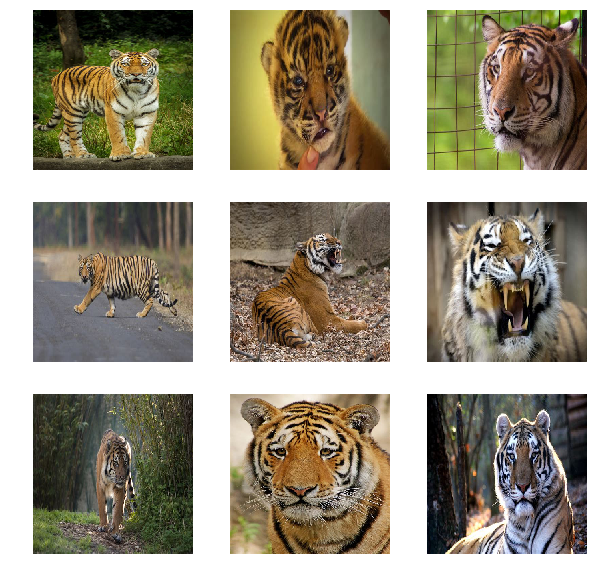

In [18]:
## Show the retrieved result

from keras.preprocessing.image import load_img 
import matplotlib.pyplot as plt

fnames = os.listdir(loc_data)
fig = plt.figure(figsize=(10,10))
count = 1
for fnm in fnames[:9]:
    img = load_img(loc_data +fnm,target_size=(400,400))
    ax = fig.add_subplot(3,3,count)
    count += 1
    ax.imshow(img)
    ax.axis("off")
plt.show()

In [22]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0.]], dtype=float32)